# 7 文件和数据格式化
> 7.1 文件的使用    
> 7.2 实例11：自动轨迹绘制    
> 7.3 一维数据的格式化和处理   
> 7.4 二维数据的格式化和处理   
> 7.5 模块6：wordcloud库的使用    
> 7.6 实例12：政府工作报告词云    

## 7.1 文件的使用
> 文件类型，文件的打开和关闭，文件内容的读取，数据的文件写入；

### 7.1.1 文件类型
1. 文件是数据的抽象和集合：存储在辅助存储器上的数据序列；数据存储的一种形式；有文本文件和二进制文件；
2. 文本文件：由单一特定编码组成的文件，如UTF-8编码；存储着的长字符串；例如：.txt、.py等；    
2. 二进制文件：直接由比特0和1组成，没有统一字符编码；一般存在二进制0和1的组织结构，即文本格式；例如：.png、.avi文件等；

### 7.1.2 文件打开与关闭
> 步骤：打开-操作-关闭    

1. `a = open( , )`：打开文件（文件存储状态->文件的占用状态）；`a.close()`：关闭文件（文件的占用状态->文件存储状态）;      
2. 读文件：`a.read(size)`、`a.readline(size)`、`a.readlines(hint)`；     
3. 写文件：`a.write(s)`、`a.writelines(lines)`、`a.seek(offset)`；   

文件打开：`<变量名> = open(<文件名>, <打开模式>)`：1）文件名：文件路径和名称，源文件同目录可省略路径（python中路径间隔使用‘/’或者‘\\’）；2）打开模式：文本或者二进制，读或者写；3）变量名：文件句柄；      
* 打开模式：   

| 文件的打开模式  |     描述         |
| :-------------- | :-------------   |
| 'r'             | 只读模式，默认值，如果文件不存在，返回FileNotFoundError   |
| 'w'             | 覆盖写模式，文件不存在则创建，存在则完全覆盖  |
| 'x'             | 创建写模式，文件不存在则创建，存在则返回FileExistsError   |
| 'a'             | 追加写模式，文件不存在则创建，存在则在文件最后追加内容    |
| 'b'             | 二进制文本模式     |
| 't'             | 文本文件模式，默认值    |
| '+'             | 与r/w/x/a一同使用，在原功能基础上增加同时读写功能         |


### 7.1.3 文件内容的读取

| 操作方法             |            描述           |     实例          |
| :--------------      | :-------------            | :-------------    |
| <f>.read(size=-1)    | 读取全部内容，如果给出参数，读取前size长度 | s = f.read(2)：中国  |
| <f>.readline(size=-1)| 读入一行内容，如果给出参数，读入该行前size长度 | s = f.readline()：中国是一个伟大的国家！  |
| <f>.readlines(hint=-1)| 读入文件所有行，以每行为元素形成列表，如果给出参数，读入前hint行  | s = f.readlines()：['中国是一个伟大的国家！']  |
    

文件的全文本操作：   
1. 遍历全文本：法一（一次性读入不适用大文本）     
``
fname = input("请输入要打开的文件名称：")
fo = open(fname,"r")
txt = fo.read()   #一次读入，一次遍历
#对全文txt进行处理
fo.close()
``      
2. 遍历全文本：法二（按数量读入，逐步处理）     
``
fname = input("请输入要打开的文件名称：")
fo = open(fname,"r")
txt = fo.read(2)    #从文件中读入2个字节
while txt != "":    
    #对全文txt进行处理
    txt = fo.read(2)
fo.close()
``     
3. 逐行遍历文件：法一（一次读入，分行处理）    
``
fname = input("请输入要打开的文件名称：")
fo = open(fname,"r")
for line in fo.readlines():
    print(line)
fo.close()
``     
4. 逐行遍历文件：法二（分行读入，逐行处理）    
``
fname = input("请输入要打开的文件名称：")
fo = open(fname,"r")
for line in fo:
    print(line)
fo.close()
``     
### 7.1.4 数据的文件写入

|  操作方法    |   描述    |  实例      |
|:-------------|:----------|:-----------|
| <f>.write(s) | 向文件写入一个字符串或字节流  | f.write("中国是一个伟大的国家！")  |
| <f>.writelines(lines) | 将一个元素全为字符串的列表写入文件 | ls = ["中国", "法国","美国"]    f.writelines(ls)：中国法国美国  |
| <f>.seek(offset) | 改变当前文件操作指针的位置，offset含义如下：0-文件开头；1-当前位置；2-文件结尾 | f.seek(0)  #回到文件开头 |


## 7.2 自动轨迹绘制
### 7.2.1 问题分析
需求：根据脚本来绘制图形；不是写代码而是写数据绘制轨迹；数据脚本是自动化最重要的第一步；    
### 7.2.2 实例
基本思路：    
1. 定义数据文件格式（接口）；
2. 编写程序，根据文件接口解析参数绘制图形；    
3. 编制数据文件；    


In [1]:
#AutoTraceDraw.py
import turtle as t
t.title('自动轨迹绘制')
t.setup(800, 600, 0, 0)  #设置画布大小
t.pencolor("red")   #设置画笔颜色
t.pensize(5)   #设置画笔粗细
#数据读取
datals = []    #空列表
f = open("E:/python/learn/data.txt")   #打开文件
for line in f:     #在文件中读取遍历每一行
    line = line.replace("\n","")    #第一行line将文件最后的换行符转换为空字符串
    datals.append(list(map(eval, line.split(","))))   #map函数为内嵌函数：（无需import直接使用）对一个列表或一个集合组合数据类型的每一个元素都执行一次第一个参数所对应的函数；
f.close()
#自动绘制
for i in range(len(datals)):
    t.pencolor(datals[i][3],datals[i][4],datals[i][5])
    t.fd(datals[i][0])
    if datals[i][1]:
        t.right(datals[i][2])
    else:
        t.left(datals[i][2])    

| 源数据|
|:------|
|300,0,144,1,0,0|
|300,0,144,0,1,0|
|300,0,144,0,0,1|
|300,0,144,1,1,0|
|300,0,108,0,1,1|
|184,0,72,1,0,1|
|184,0,72,0,0,0|
|184,0,72,0,0,0|
|184,0,72,0,0,0|
|184,1,72,1,0,1|
|184,1,72,0,0,0|
|184,1,72,0,0,0|
|184,1,72,0,0,0|
|184,1,72,0,0,0|
|184,1,720,0,0,0|

## 7.3 一维数据的格式化和处理
> 数据组织的维度；一维数据的表示；一维数据的存储；一维数据的处理；

### 7.3.1 数据组织的维度
一维数据：由对等关系的有序或无序数据构成，采用线性方式组织：列表、数组、集合；     
二维数据：由多个一维数据构成，是以为数据的组合形式；     
多维数据：由一维或二维数据组成；     

数据的操作周期：存储（存储格式）-表示（数据类型）-操作（操作方式）；     

### 7.3.2 一维数据表示
* 如果数据间有序：使用列表类型；列表类型可以表达一维有序数据；for循环可以遍历数据，进而对每个数据进行处理；   
* 如果数据间无序：使用集合类型；集合类型可以表达一维无序数据；for循环可以遍历数据，进而对每个数据进行处理；   

### 7.3.3 一维数据的存储
1. 空格分隔：使用一个或多个空格分隔进行存储，不换行；缺点是数据中不能存在空格；
2. 逗号分隔：使用英文半角逗号进行分隔，不换行；缺点是数据不能存在逗号；   
3. 其他方式：采用特殊符号进行分隔；缺点是数据中不能出现分隔字符；  

### 7.3.4 一维数据的处理
1. 从空格分隔的数据读入：    
``
txt = open(fname).read()
ls = txt.split()
f.close()
``    
2. 从特殊符号分隔中读入：    
``
txt = open(fname).read
ls = txt.split("&")
f.close()
``  
3. 采用空格写入文件：    
``
ls = ['中国','美国','日本']
f = open(fname, 'w')
f.write(' '.join(ls))  #join方法：将join前面的字符串分割放置到后边的join参数中的各个元素之间
f.close()
``   
4. 采用特殊分隔写入文件：   
``
ls = ['中国','美国','日本']
f = open(fname, 'w')
f.write('&'.join(ls))  #join方法：将join前面的字符串分割放置到后边的join参数中的各个元素之间
f.close()
``     


## 7.4 二维数据的格式化和处理
### 7.4.2 二维数据的表示
使用列表类型：二维列表（列表中嵌入列表）；使用两层for遍历每个元素；   

### 7.4.3 CSV格式与二维数据的存储
1. CSV：Comma-Separated Values：国际通用的一二维数据存储格式，一般`.csv`扩展模；每行一个一维数据，采用逗号分隔，无空行；Excel和一般编辑软件都可以读入或另存为csv文件；   
2. 如果某个元素缺失，逗号仍要保留；二维数据的表头可以作为数据存储，也可以另行存储；    
3. 一般索引习惯：`ls[row][column]`，先行后列；   

### 7.4.4 二维数据的处理
1. 从CSV格式的文件中读取数据：   
``
fo = open(fname)
ls = []
for line in fo:
    line = line.replace("\n","")   #去掉最后的换行符
    ls.append(line.split(","))   #按照逗号分隔开形成列表，把列表增加到ls列表中
fo.close()
``    
2. 将数据写入CSV格式的文件：    
``
ls = [[],[],[]]   #二维列表
f = open(fname, 'w')
for item in ls:
    f.write(','.join(item) + '\n')   #元素间增加逗号，并在结尾增加换行符
f.close()
``    

    

## 7.5 wordcloud库使用说明  
### 7.5.1 基本介绍
为词云展示第三方库：词云以词语为基本单位，更加直观和艺术的展示文本；   
### 7.5.2 使用说明
wordcloud库把词云当作一个wordCloud对象；   
wordcloud.WordCloud()代表一个文本对应的词云；   
可以根据文本中词语出现的频率等参数绘制词云；   
绘制词云的形状、尺寸和颜色都可以设定；   

常规方法`w = wordcloud.WordCloud()`：   

|   方法       |      描述           |      示例             |
|:-------------|:--------------------|:----------------------|
|w.generate(txt)|向WordCloud对象w中加载文本txt|w.generate("Python and WordCloud")|
|w.to_file(filename)|将词云输出为图像文件，.png或.jpg格式|w.to_file("outfile.png")|

``
import wordcloud
c = wordcloud.WordCloud()
c.generate("wordcloud by Python")
c.to_file("ex.png")
``  

步骤：     
1. 配置对象参数；   
2. 加载词云文本；   
3. 输出词云文件；   

从文本到结果：    
1. 分隔：以空格分隔单词；   
2. 统计：单词出现次数并过滤；   
3. 字体：根据统计配置字号；   
4. 布局：颜色环境尺寸；   

配置对象参数：   
`w = wordcloud.WordCloud(<参数>)`：   

| 参数      |   描述           |  示例   |
|:----------|:-----------------|:--------|
| width     | 指定词云对象生成图片的宽度，默认400像素；|w=wordcloud.WordCloud(width=600)|
|height     | 指定词云对象生成图片的高度，默认200像素；|w=wordcloud.WordCloud(height=400)|
|min_font_size|指定词云中字体的最小字号，默认4号；|w=wordcloud.WordCloud(min_font_size=10)|
|max_font_size|指定词云中字体的最大字号，根据高度自动调节；|w=wordcloud.WordCloud(max_font_size=20)|
|font_step    |指定词云中字体的步进间隔，默认为1；|w=wordcloud.WordCloud(font_step=2)|
|font_path    |指定词云中字体文件的路径，默认为None；|w=wordcloud.WordCloud(font_path="msyh.ttc")|
|max_words    |指定词云显示的最大单词数量，默认为200；|w=wordcloud.WordCloud(max_words=20)|
|stop_words   |指定词云的排除列表，即不显示的单词列表；|w=wordcloud.WordCloud(stop_words={"Python"})|
|mask         |指定词云形状，默认为长方形，需要引用imread()函数；| 见下面    |
|background_color|指定词云图片的背景颜色，默认为黑色；|w=wordcloud.WordCloud(background_color="white")|

mask参数``
from scipy.mis import imread  
mk=imread("pic.png")
w=wordcloud.WordCloud(mask=mk)|
``     


In [6]:
# 7.5wordcloud.py
import wordcloud
txt = "life is short, you need python"
w = wordcloud.WordCloud(background_color = "white")
w.generate(txt)
w.to_file("E:\\python\\learn\\ex.png")

In [7]:
# 7.5wordcloud2.py
import jieba
import wordcloud
txt = "程序设计语言是计算机能够理解和识别用户操作意图的一种交互式体系，它按照特定规则组织计算机指令，使计算机能够自动进行各种运算处理。"
w = wordcloud.WordCloud(width=1000, font_path="msyh.ttc", height=700)
w.generate(" ".join(jieba.lcut(txt)))   #将文本进行分词；lcut生成列表变量，其中每个元素是分隔之后的单词，然后让单词以文本的形式由空格来分隔组成
w.to_file("E:\\python\\learn\\ex2.png")

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\zmzhang\AppData\Local\Temp\jieba.cache
Loading model cost 2.398 seconds.
Prefix dict has been built successfully.


## 7.6 政府工作报告词云
基本思路：   
1. 读取文件、分词整理；   
2. 设置并输出词云；   
3. 观察结果，优化迭代；   

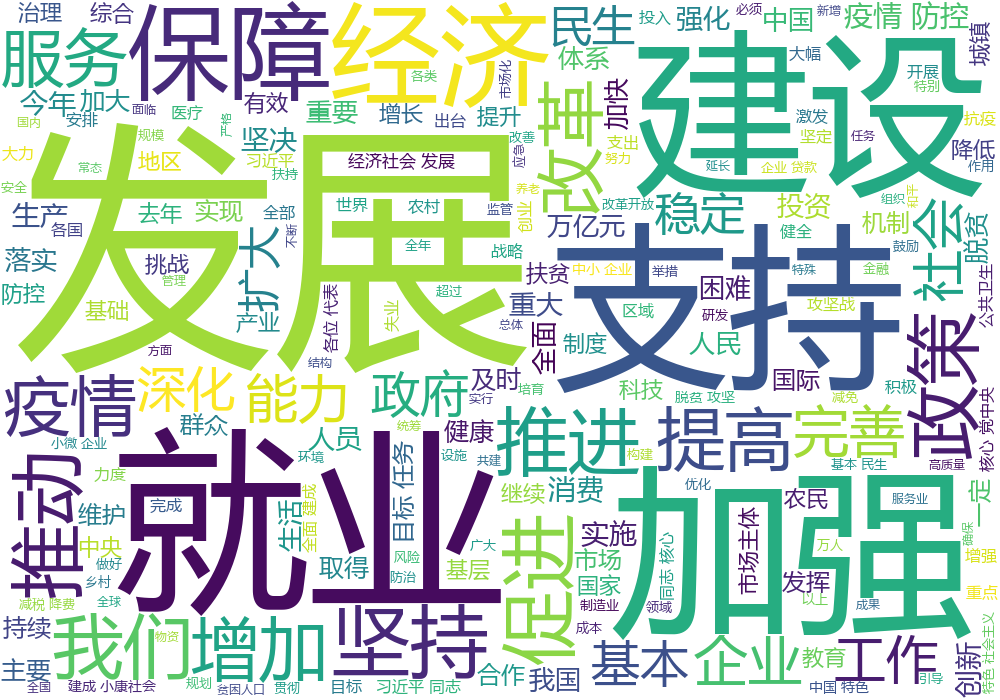



In [12]:
# GovRptWordCloudv1.py
import jieba
import wordcloud
f = open("E:\\python\\learn\\2020政府工作报告.txt", "r", encoding="utf-8")
t = f.read()
f.close()
ls = jieba.lcut(t)
txt = " ".join(ls)
w = wordcloud.WordCloud(width=1000, font_path="msyh.ttc", height=700, background_color="white",)
w.generate(txt)
w.to_file("E:\\python\\learn\\2020政府工作报告.png")

In [13]:
# GovRptWordCloudv2.py
import jieba
import wordcloud
from scipy.misc import imread
mask = imread("E:\\python\\learn\\fivestart.png")
f = open("E:\\python\\learn\\2020政府工作报告.txt", "r", encoding="utf-8")
t = f.read()
f.close()
ls = jieba.lcut(t)
txt = " ".join(ls)
w = wordcloud.WordCloud(mask=mask, width=1000, font_path="msyh.ttc", height=700, background_color="white",)
w.generate(txt)
w.to_file("E:\\python\\learn\\2020政府工作报告2.png")

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
